In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

In [2]:
df= pd.read_csv("transaction.csv")

In [3]:
df.head()

,LREMITNO,INSTRUMENTTYPE,AGENTLOCATIONIDFROM,SENDINGAGENTCOMPANYID,SERVICEPROVIDERCODE,DRAWEEBANKBRANCHID,DRAWEEBANKID,PAYOUTCOUNTRYCODE,PAYINCOUNTRYCODE,AGENTTXNREFNO,...,MODIFIEDBY,VERIFIEDON,VERIFICATIONGMTDATE,VERIFIEDBY,TXNGMTDATE,TXNGMTDATENT,REMARKS,VERIFICATIONREMARKS,ROWVERSION,TAXINVOICENO
0,1240018125291440,LR,784999,784100,LULUXMY#####,243981,10039,IN,MY,1.24001812529144E+016,...,10005roy,09/09/18 13:05,09/09/18 05:05,10005roy,09/09/18 05:04,09/09/18 05:04,,NIL,154673372,4.581002e+19
1,1240018125248920,LR,458105,458100,LULUXMY#####,243981,10039,IN,MY,1.24001812524892E+016,...,10005roy,09/09/18 14:38,09/09/18 06:38,10005roy,09/09/18 06:38,09/09/18 06:38,,NIL,154673371,4.581002e+19
2,1240018125259110,LR,458105,458100,LULUXMY#####,243981,10039,IN,MY,1240018125259110,...,10005roy,09/09/18 14:42,09/09/18 06:42,10005roy,09/09/18 06:42,09/09/18 06:42,,NIL,154667031,4.581002e+19
3,1089018125324210,LR,634214,634212,LULUXAE#####,477222,10078,IN,QA,1089018125324210,...,10005bibins,10/09/18 09:57,10/09/18 07:00,10005bibins,10/09/18 07:00,10/09/18 07:00,,NIL,154667048,NaN
4,1240018125216060,LR,458105,458100,LULUXMY#####,243981,10039,IN,MY,1240018125216060,...,10005roy,10/09/18 17:01,10/09/18 09:01,10005roy,09/09/18 09:06,09/09/18 09:06,,NIL,154667052,4.581002e+19


In [4]:
df.count()
# There are many missing values in the tax invoice number

LREMITNO                 6442
INSTRUMENTTYPE           6442
AGENTLOCATIONIDFROM      6442
SENDINGAGENTCOMPANYID    6442
SERVICEPROVIDERCODE      6442
                         ... 
TXNGMTDATENT             6442
REMARKS                  6442
VERIFICATIONREMARKS      6442
ROWVERSION               6442
TAXINVOICENO             4548
Length: 61, dtype: int64

In [5]:
# No. of transactions done by a specific bank
print(df.groupby('DRAWEEBANKID')['LREMITNO'].nunique())

DRAWEEBANKID
10006      15
10009      61
10010       1
10011     302
10017      24
10027      20
10039      25
10065     525
10078    2213
10327     188
10387       6
10399       1
10400      13
10474      28
10892       6
10893      40
10894      34
10897      13
10899      11
10903      21
10942      51
10943      11
10976     102
10977     467
10978      30
10979     234
10980     354
10982       3
10998       2
11049       4
11221     163
11232     133
11233      68
11267     113
11529       3
11566      37
11667       1
11685      44
11753      44
11770      65
11883     190
11927       5
12058      61
12205     138
12676      19
12686       7
14078     195
14186       6
14305       1
14595      14
14765       1
15115       3
15119      95
15508     110
15673      12
15682      71
15683      34
Name: LREMITNO, dtype: int64


In [6]:
print(df.groupby('PAYOUTCOUNTRYCODE')['LREMITNO'].nunique())

PAYOUTCOUNTRYCODE
AE       2
AU       1
BD     368
CY       2
EG     415
GB      14
ID     281
IL       1
IN    3183
JO       3
LK    1134
LU       1
MA     195
NP      62
PH     147
PK     624
US       2
Name: LREMITNO, dtype: int64


In [7]:
print(df.groupby('PAYINCOUNTRYCODE')['LREMITNO'].nunique())

PAYINCOUNTRYCODE
AE    4256
BH     121
HK     100
IE       1
IN       1
KW     376
MY     212
OM     568
PH      71
QA     701
SC      13
SG      10
Name: LREMITNO, dtype: int64


In [8]:
df.describe()

,AGENTLOCATIONIDFROM,SENDINGAGENTCOMPANYID,DRAWEEBANKBRANCHID,DRAWEEBANKID,AGENTXCHGRATEPAYINTOPAYOUTO,AGENTXCHGRATEPAYINTOPAYOUT,XCHGRATEPAYINTOPAYOUT,XCHGRATEUSDTOPAYOUT,XCHGRATEUSDTOPAYIN,XCHGRATEUSDTOSETTLEMENT,...,LRPAYOUTAMTINUSD,LRCOMMISSIONINUSD,LRTAXINUSD,LROTHERCHGSINUSD,ADDITIONALSERVICES,LREMITAGENTSTATUS,LREMITAGENTSTATUS2,RATEPUBLISHINFO,ROWVERSION,TAXINVOICENO
count,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.000000,6442.0,...,6442.000000,6442.000000,6442.000000,6442.0,6442.0,6.442000e+03,6.442000e+03,6442.0,6.442000e+03,4.548000e+03
mean,696469.911984,696332.990997,407371.992704,10945.647004,0.091768,0.091719,0.089751,669.306733,3.775406,1.0,...,414.329573,4.471410,0.189440,0.0,0.0,4.877949e+07,8.638253e+04,2.0,1.546775e+08,7.645144e+19
std,134126.794059,134107.997301,154542.088635,1368.156426,0.741816,0.741754,0.627259,2782.150743,5.500999,0.0,...,2000.878811,1.910418,0.400945,0.0,0.0,2.754291e+08,8.447492e+05,0.0,4.911107e+03,7.658688e+18
min,344102.000000,344100.000000,129390.000000,10006.000000,0.000254,0.000254,0.000253,0.771849,0.302820,1.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,1.000000e+00,2.0,1.546670e+08,4.581002e+19
25%,634012.000000,634008.000000,214481.000000,10078.000000,0.020280,0.020280,0.020279,70.226114,3.647000,1.0,...,9.420000,4.080000,0.000000,0.0,0.0,5.150000e+02,1.000000e+00,2.0,1.546732e+08,7.841002e+19
50%,784101.000000,784100.000000,472205.000000,10327.000000,0.051992,0.051992,0.051492,71.031350,3.673000,1.0,...,111.290000,4.410000,0.220000,0.0,0.0,1.689900e+04,1.000000e+00,2.0,1.546786e+08,7.841002e+19
75%,784272.000000,784100.000000,516173.000000,11221.000000,0.052803,0.052489,0.052302,154.500000,3.673000,1.0,...,347.627500,5.300000,0.220000,0.0,0.0,6.912300e+04,1.025000e+03,2.0,1.546822e+08,7.841002e+19
max,784999.000000,784100.000000,602635.000000,15683.000000,54.850000,54.850000,44.850000,14499.999000,65.000000,1.0,...,126653.620000,40.830000,7.190000,0.0,0.0,1.880115e+09,8.388737e+06,2.0,1.546844e+08,7.841002e+19


In [9]:
# Co-Relation to find the Payout Currency & Payin Currency
df['PAYOUTCOUNTRYCODE'].corr(df['PAYINCOUNTRYCODE'], method= 'spearman')

-0.01731290060441241

In [10]:
pe = list(df.columns.values)

AxesSubplot(0.125,0.125;0.62x0.755)


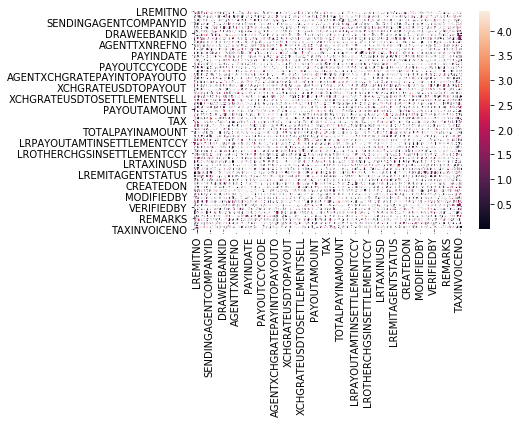

In [11]:
Index= pe
Cols = pe
df = pd.DataFrame(abs(np.random.randn(61, 61)), index=pe, columns=pe)
print(sns.heatmap(df, annot=True))